In [1]:
!pip install pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
 
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
 
df = df.drop(columns=['Cabin'])
df = df.drop(columns=['Name', 'Ticket'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

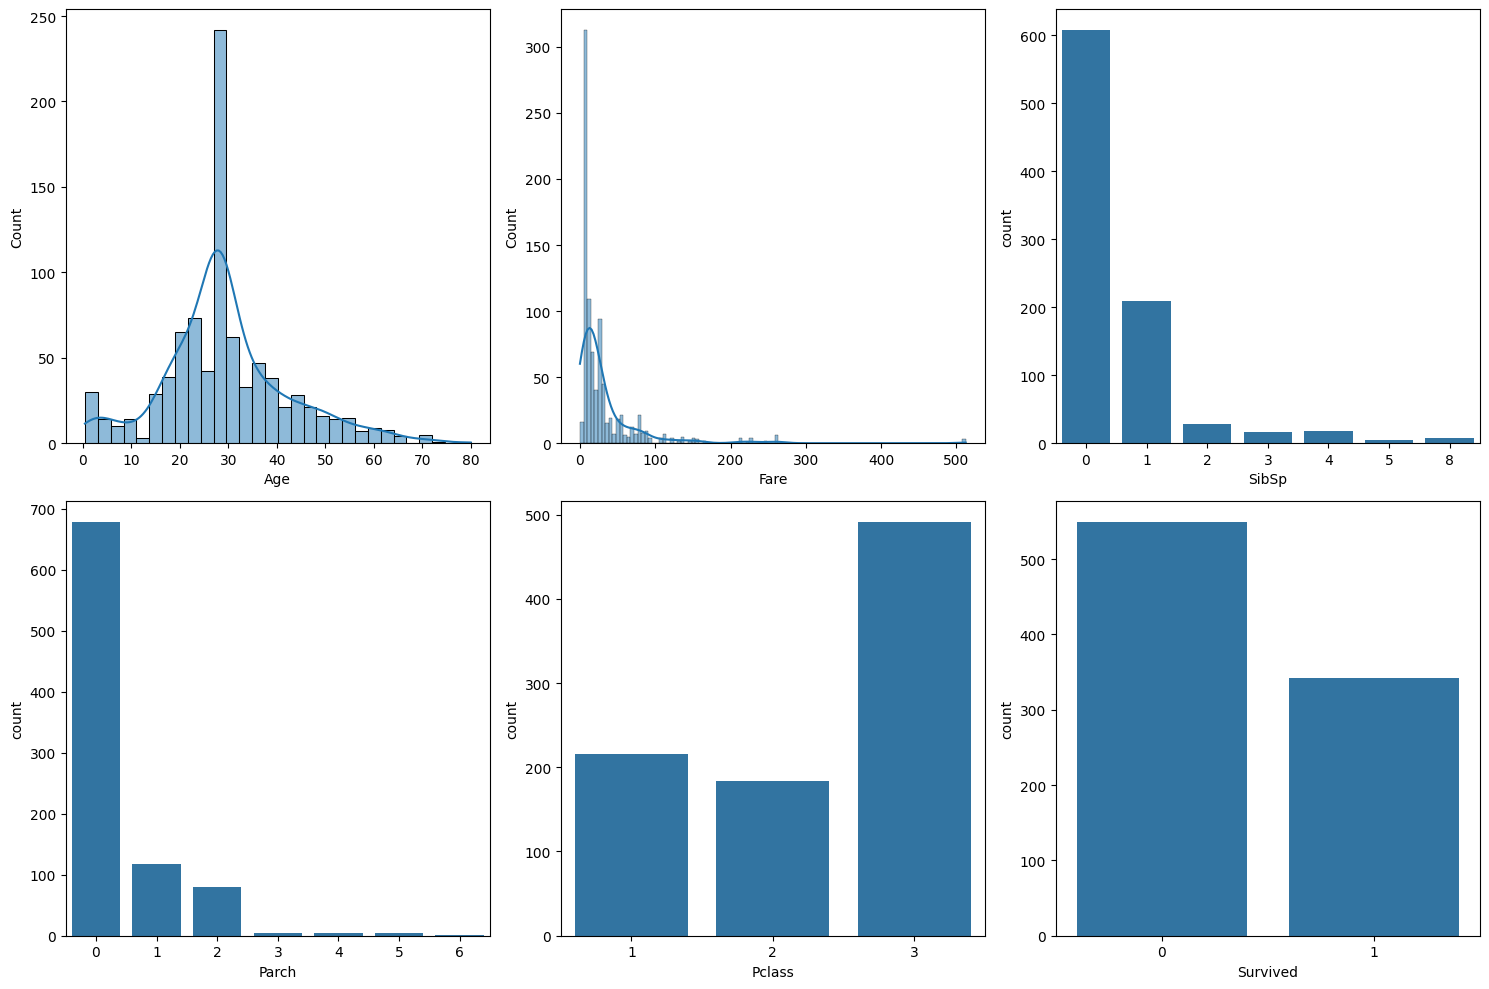

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['Age'], kde=True, ax=axs[0, 0])
sns.histplot(df['Fare'], kde=True, ax=axs[0, 1])
sns.countplot(data=df, x='SibSp', ax=axs[0, 2])
sns.countplot(data=df, x='Parch', ax=axs[1, 0])
sns.countplot(data=df, x='Pclass', ax=axs[1, 1])
sns.countplot(data=df, x='Survived', ax=axs[1, 2])
plt.tight_layout()
plt.show()

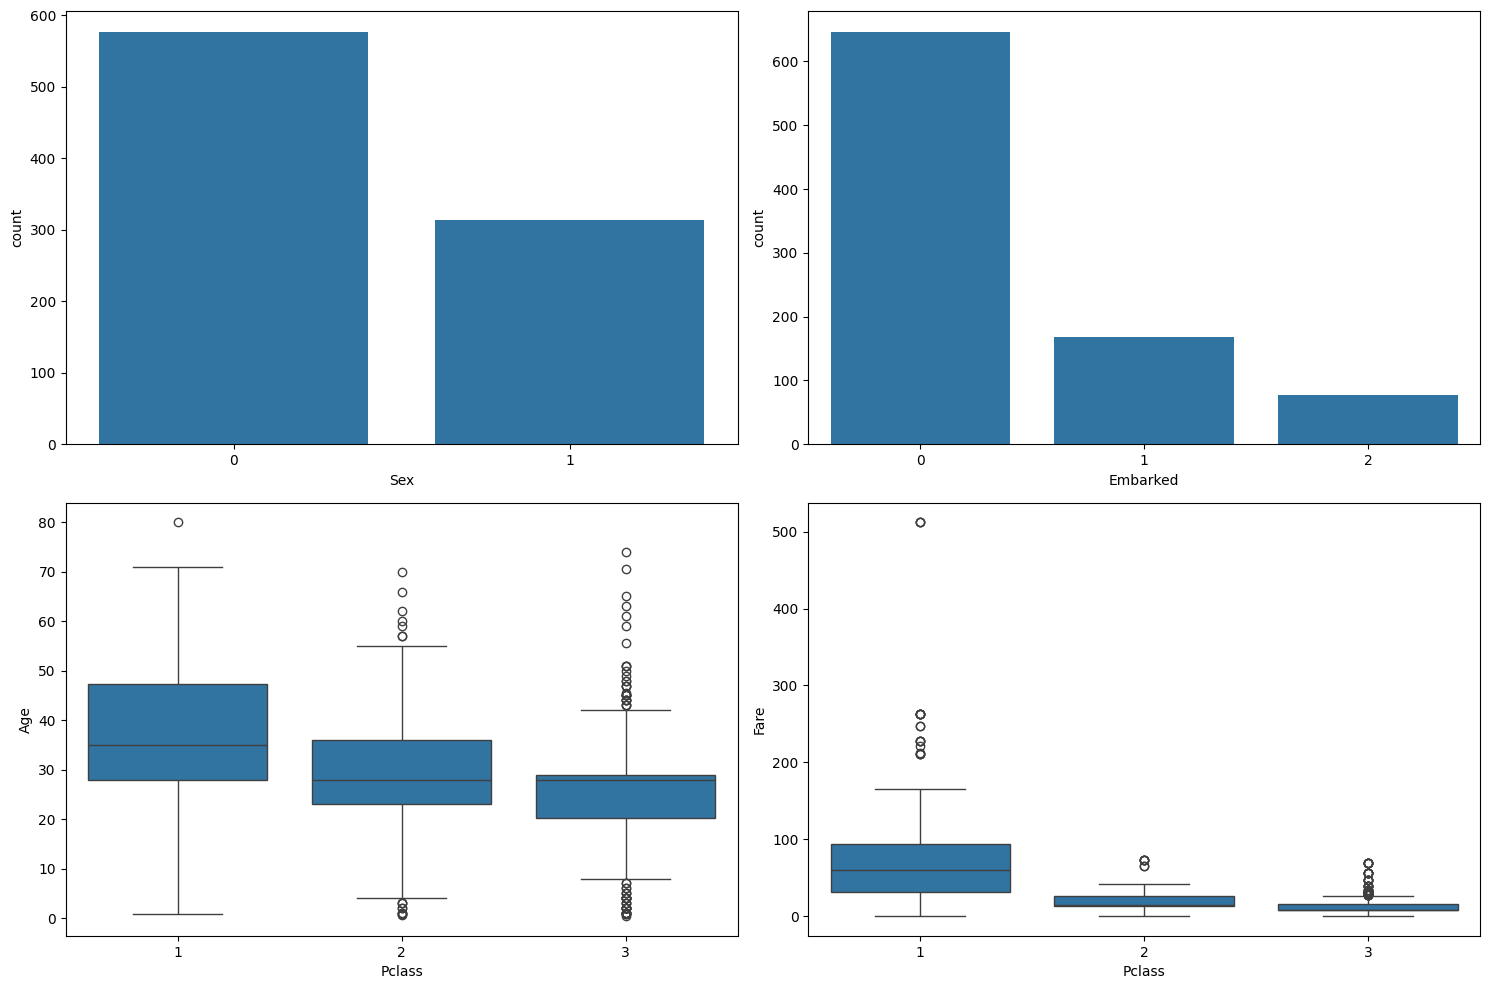

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(data=df, x='Sex', ax=axs[0, 0])
sns.countplot(data=df, x='Embarked', ax=axs[0, 1])
sns.boxplot(data=df, x='Pclass', y='Age', ax=axs[1, 0])
sns.boxplot(data=df, x='Pclass', y='Fare', ax=axs[1, 1])
plt.tight_layout()
plt.show()

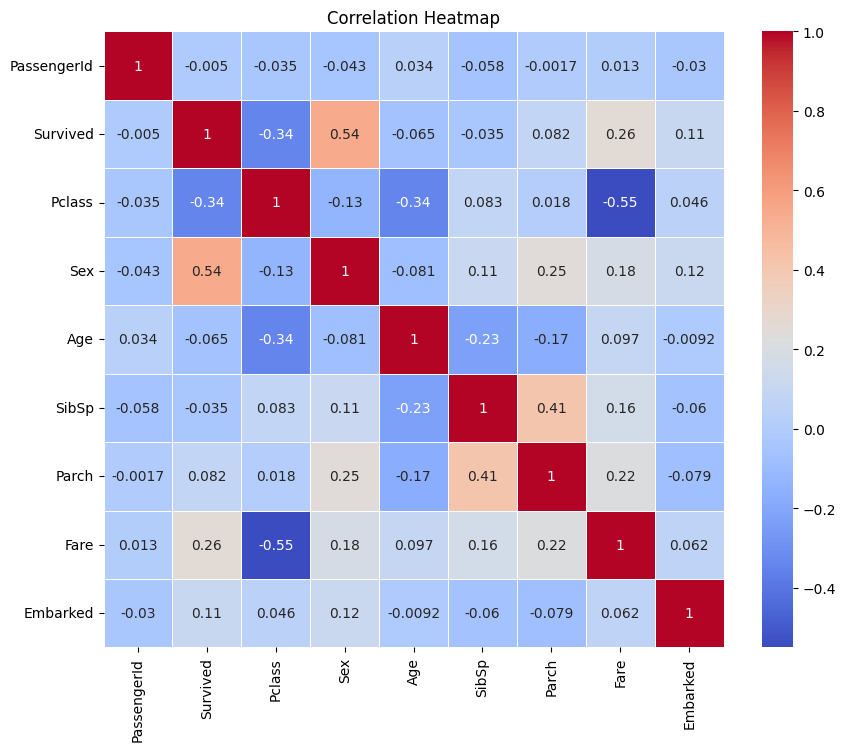

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

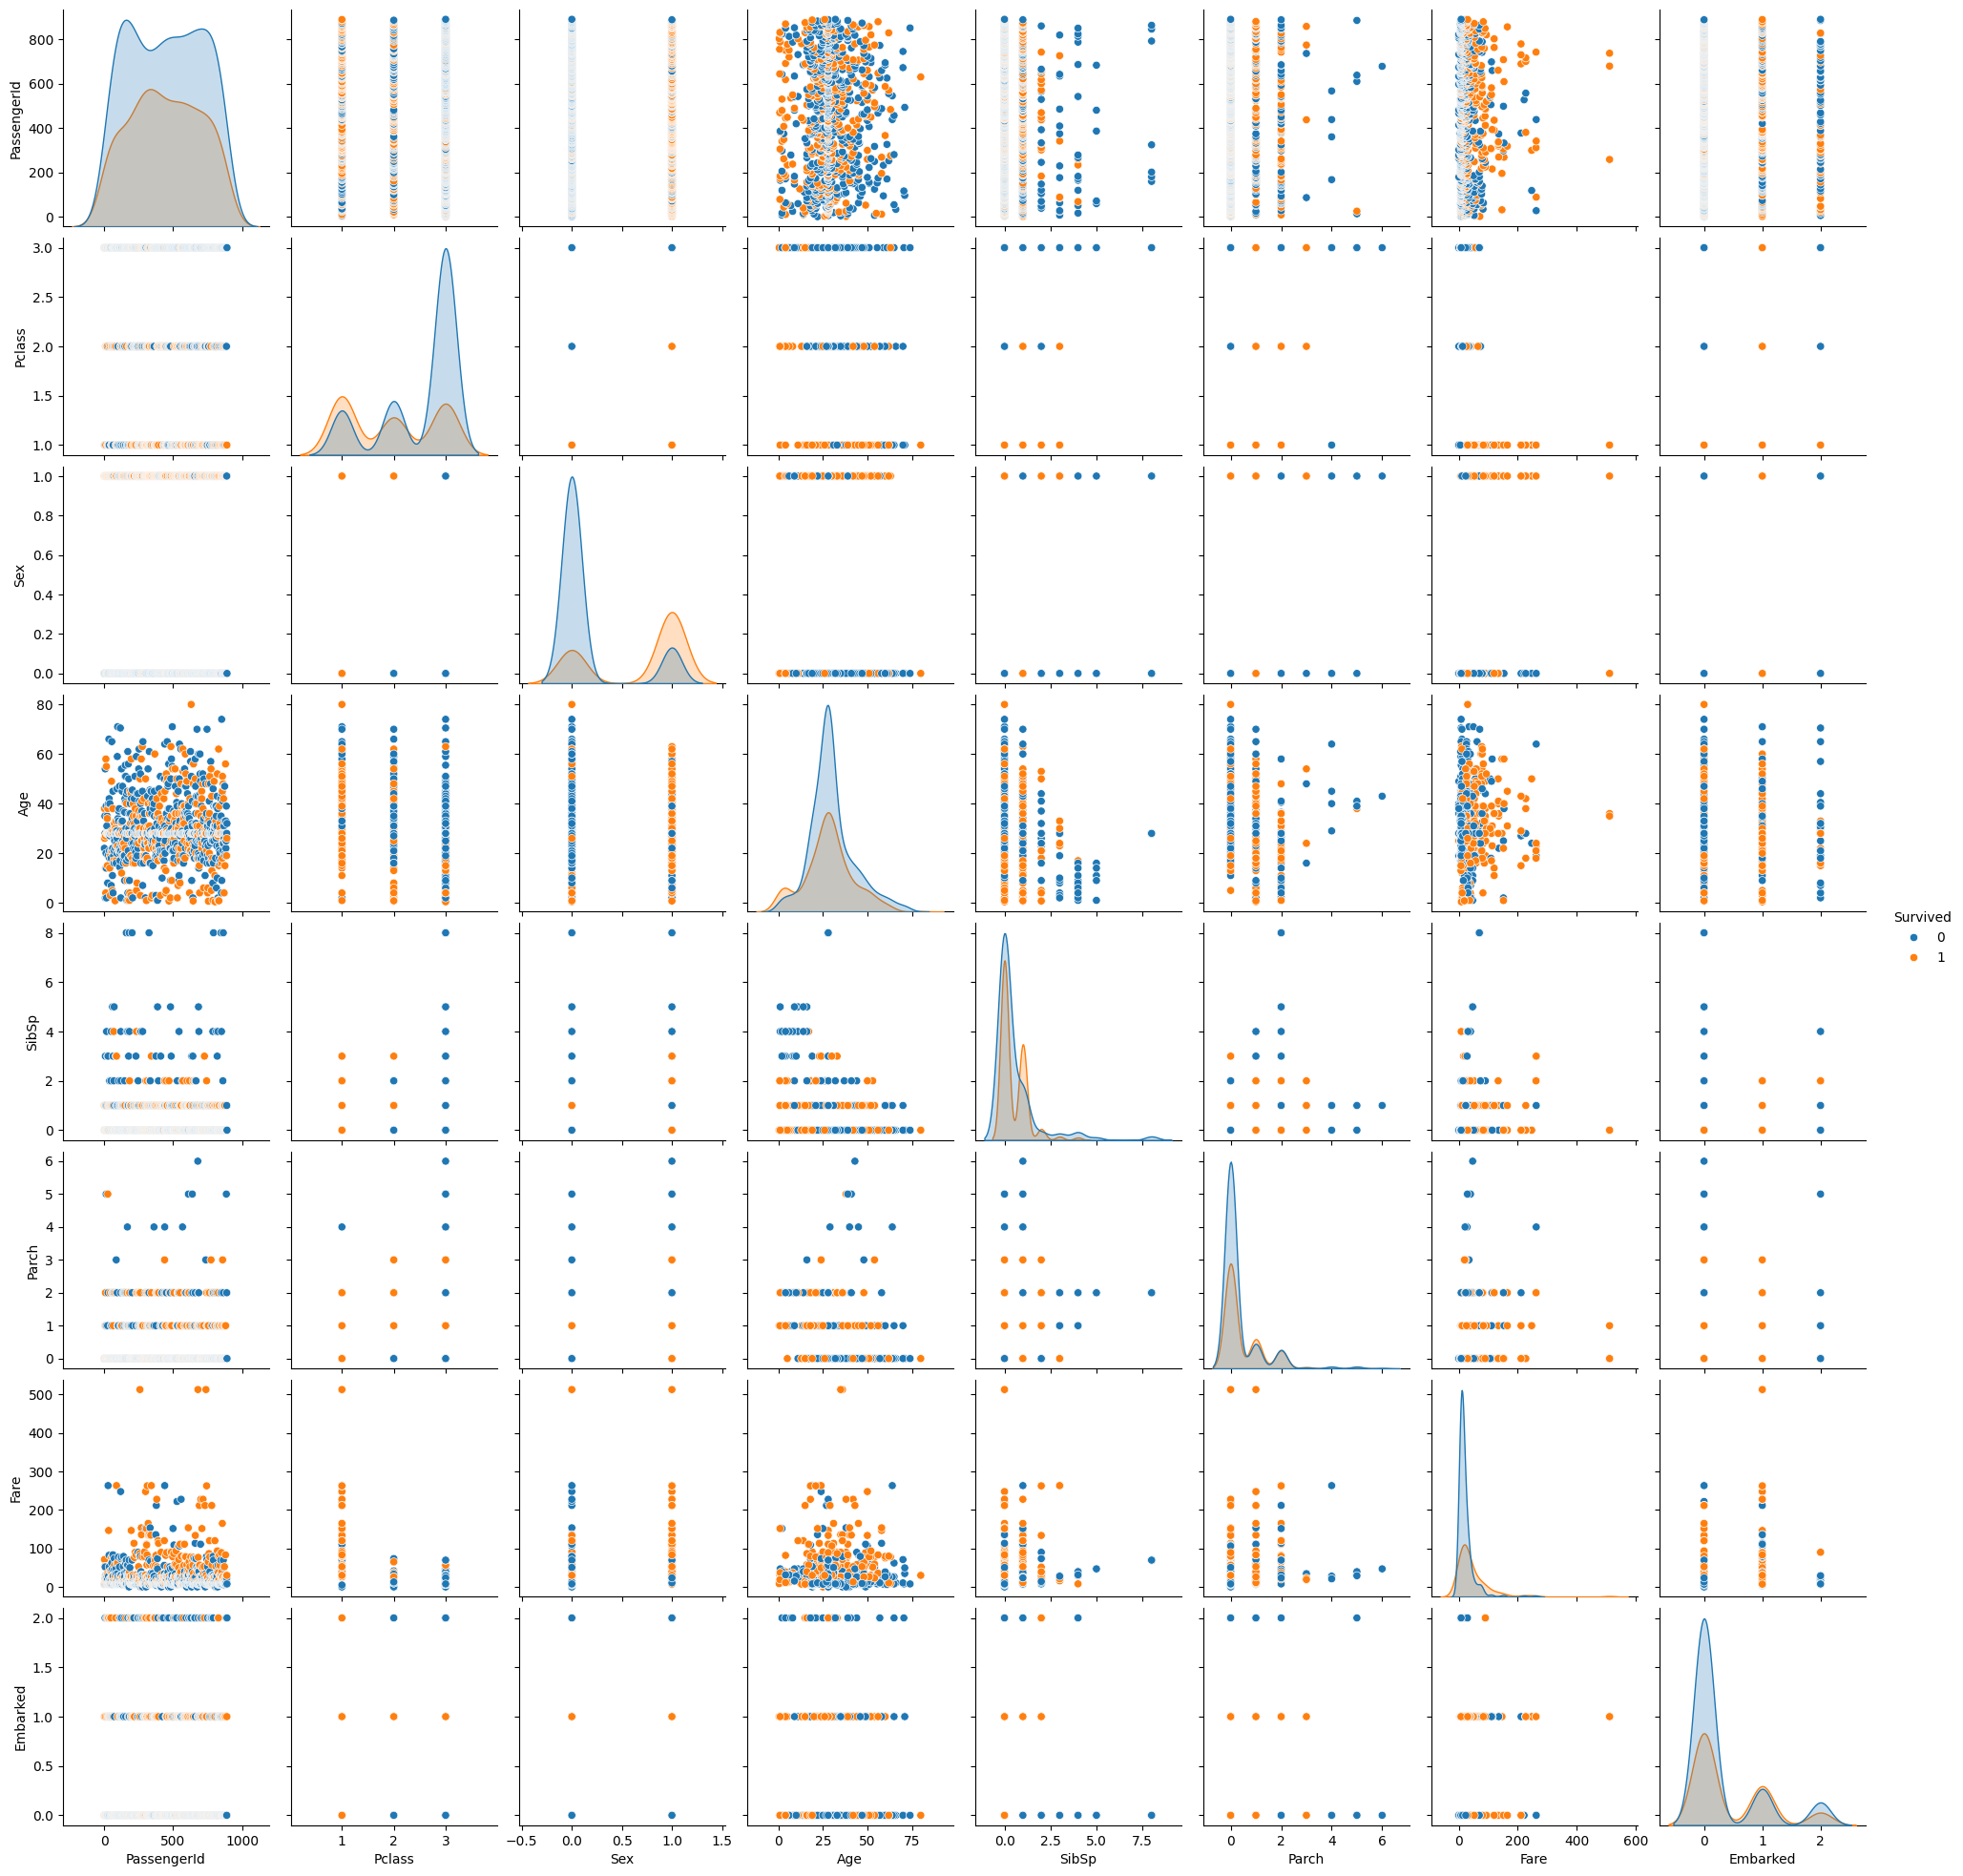

In [20]:
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()

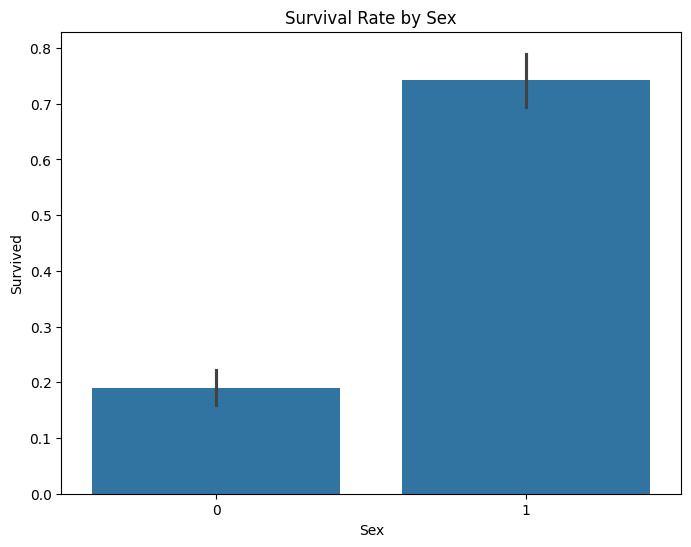

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

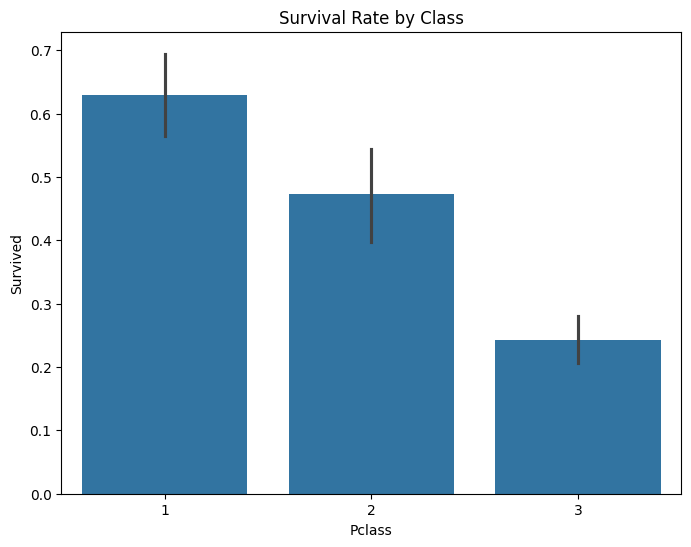

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.show()

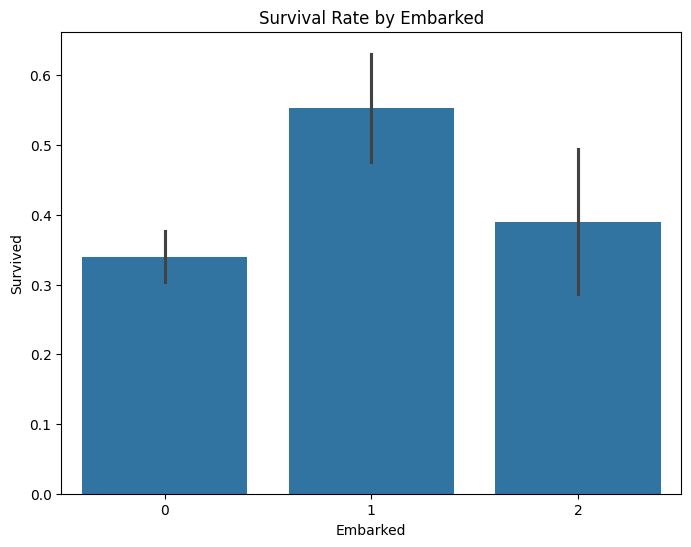

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked')
plt.show()

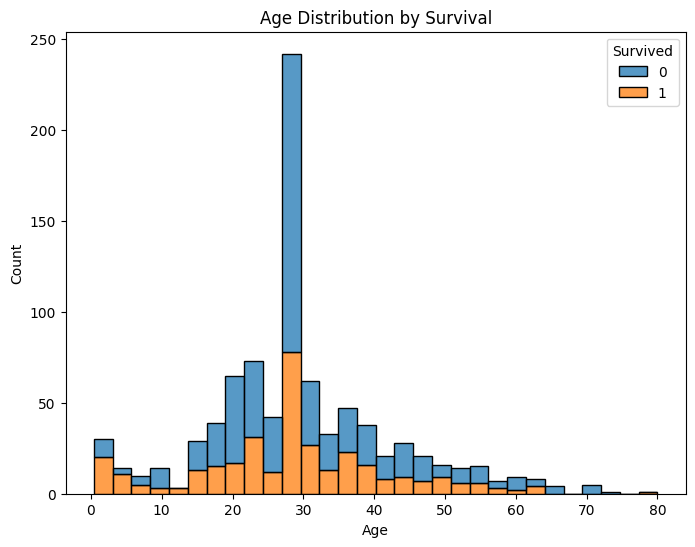

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

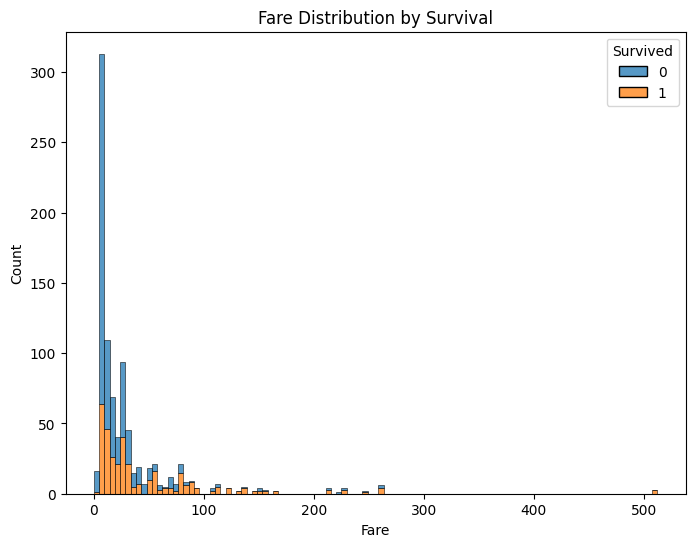

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack')
plt.title('Fare Distribution by Survival')
plt.show()

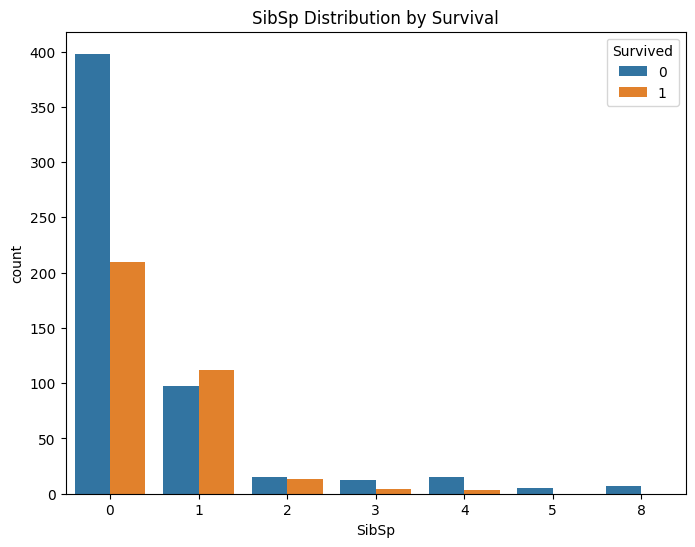

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('SibSp Distribution by Survival')
plt.show()

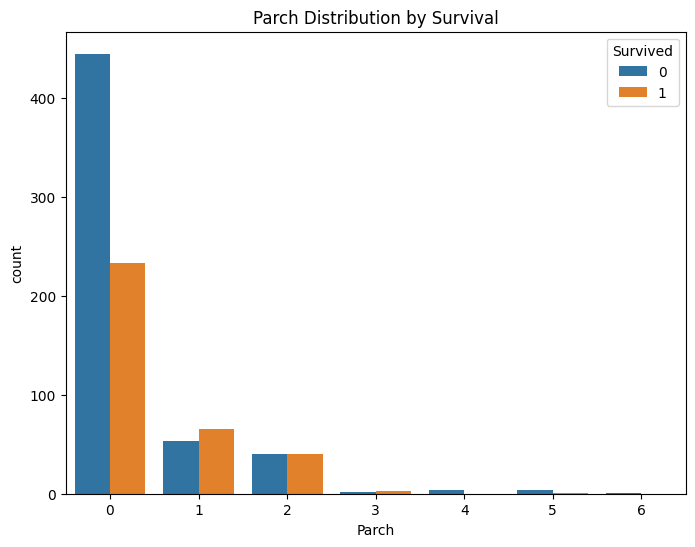

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title('Parch Distribution by Survival')
plt.show()


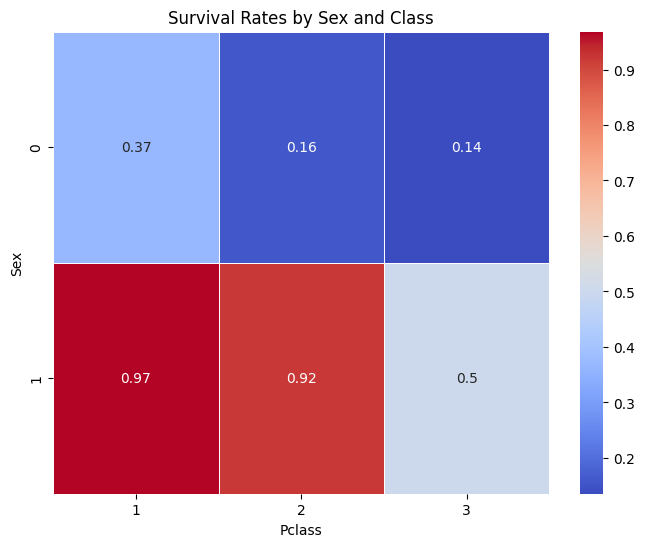

In [28]:
 
pivot = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Survival Rates by Sex and Class')
plt.show()
